# Let's see the distrubutions of the predicted probabilities

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.stats import ttest_ind,bartlett


import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#Set general style of plots(optional)
mpl.style.use(['seaborn'])

#sys.path.append("/home/gari/Desktop/master_tesis_v2/")
from OFHandlers import OFHandlers as OFH

subjects_12=OFH.load_object("./subjects_12.file")

In [2]:
experiments_summary=pd.read_excel('./EXPERIMENT_CONTROL.xlsx', sheet_name="Results").set_index("ID_experiment")
experiments_summary

,counter,pre_processing,Features,Raw accu,Ajus accu,f1_score_,recall___,precision,Machine_learning_technique,Transformation,train score,path
ID_experiment,,,,,,,,,,,,
ID_1,1,clustering K=11,delta,0.539700,0.593000,0.705000,0.608000,0.840000,XGB,none,1.0000,/media/gari/extra_ssd/ordered_experiment/brain...
ID_2,2,clustering K=11,delta_theta,0.577103,0.627907,0.733333,0.637681,0.862745,XGB,polynomial,0.9395,/media/gari/extra_ssd/ordered_experiment/brain...
ID_3,3,clustering K=11,delta_theta_alpha,0.483645,0.569767,0.694215,0.608696,0.807692,RF,none,0.9479,/media/gari/extra_ssd/ordered_experiment/brain...
ID_4,4,clustering K=11,delta_theta_alpha_beta,0.530374,0.616200,0.720000,0.637600,0.840000,RF,Clustering K 72,0.9800,/media/gari/extra_ssd/ordered_experiment/brain...
ID_5,5,clustering K=11,entropy,0.530000,0.590000,0.700000,0.590000,0.854100,RF,none,0.9800,/media/gari/extra_ssd/ordered_experiment/brain...
ID_6,6,clustering K=11,delta_entropy,0.539700,0.510000,0.650000,0.560000,0.760000,XGB,none,0.9200,/media/gari/extra_ssd/ordered_experiment/brain...
ID_7,7,clustering K=11,delta_theta_entropy,0.570000,0.600000,0.734300,0.681000,0.796000,XGB,none,0.6080,/media/gari/extra_ssd/ordered_experiment/brain...
ID_8,8,clustering K=11,delta_theta_alpha_entropy,0.530000,0.530000,0.660000,0.560000,0.790000,XGB,none,1.0000,/media/gari/extra_ssd/ordered_experiment/brain...
ID_9,9,clustering K=11,delta_theta_alpha_beta_entropy,0.540000,0.550000,0.670000,0.570000,0.810000,XGB,Clustering K 56,0.8600,/media/gari/extra_ssd/ordered_experiment/brain...


In [3]:
def get_predictions_exp(id):
    df=pd.read_excel('./EXPERIMENT_CONTROL.xlsx', sheet_name=id)
    df["test_patient_id"]=df["test_patient_id"].str.strip()
    df=df.set_index("test_patient_id")
    test_subject_analysis=df.join(subjects_12)
    highest=str(test_subject_analysis[['Predicted_Target',"DX_01"]].sort_values(by=['Predicted_Target'],ascending=False)[0:3])
    lowest=str(test_subject_analysis[['Predicted_Target',"DX_01"]].sort_values(by=['Predicted_Target'],ascending=True)[0:3])
    return test_subject_analysis,highest,lowest

def generate_plots(df,title,by_c="Sex",by_2c="Age",size=(17,9),rot=90):
    """
    Generete distributions plot
    for visual exploration.
    """
    fig=plt.figure(figsize=size)

    ax0=fig.add_subplot(2,2,1)
    ax1=fig.add_subplot(2,2,2)

    ax2=fig.add_subplot(2,2,3)
    ax3=fig.add_subplot(2,2,4)
    
    colors_list=sns.color_palette("RdBu", len(df[by_c].unique())+3)
    #colors_list.reverse()

    df[by_c].value_counts().plot(kind="pie",
                                  autopct='%1.1f%%',
                                  startangle=rot,
                                  shadow=True,
                                  ax=ax0,colors=colors_list)
    ax0.set_ylabel('')
    
    
    df[[by_2c,by_c]].boxplot(by=by_c,ax=ax3, rot=90)
    ax3.set_xlabel('')
    
    
    df[by_c].value_counts().plot(kind="bar",ax=ax2,color=colors_list)
    #df[by_c].value_counts().plot(kind="bar",ax=ax2)
    
    
    i=0
    for label, df_in in df[[by_2c,by_c]].groupby(by_c):
        try:
            if(label=="ADHD-Hyperactive/Impulsive Type"):
                pass
            elif(label=="No Diagnosis Given"):
                sns.distplot(df_in[by_2c],
                             bins=10 ,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.5},
                             color="black")
            else:
                sns.distplot(df_in[by_2c],
                             bins=10,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.4},
                             color=colors_list[i])
        except:
            pass
        i=i+1

    ax1.legend()
    #ax1.set_title("Subjects Gender %. Age < 18")
    ax0.set_title("distribution by "+by_c+" total: "+str(len(df)))
    #plt.title(title)
    fig.suptitle(title, fontsize=14)
    #plt.legend(['u','v','u+v'])
    

    
def execute_test(by_c,by_2c,df_focus,mode):
    labels=[]
    skip_index=0
    for label, df in df_focus[[by_2c,by_c]].groupby(by_c):
        #print(df,label)
        for index,element in enumerate(df_focus[[by_2c,by_c]].groupby(by_c)):
            label2,df2=element[0],element[1]
            if label!=label2 and index>=skip_index:
                if mode=="mean":
                    print("t-test on:",label,label2)
                    t_test=ttest_ind(df.Predicted_Target,df2.Predicted_Target,equal_var=False)
                    print(t_test)
                    print("mean prediction for :",label,df.Predicted_Target.mean())
                    print("mean prediction for :",label2,df2.Predicted_Target.mean())
                    print("*"*100)
                if mode=="var":
                    print("bartlett on:",label,label2)
                    t_test=bartlett(df.Predicted_Target,df2.Predicted_Target)
                    print(t_test)
                    print("variance prediction for :",label,df.Predicted_Target.var())
                    print("variance prediction for :",label2,df2.Predicted_Target.var())
                    print("*"*100)
        skip_index=skip_index+1

In [4]:
    
def generate_plots_algo(df_metrics,df,title,hightest,lowest,by_c="DX_01",by_2c="Predicted_Target",size=(17,9)):
    """
    Generete distributions plot
    for visual exploration.
    """
    fig=plt.figure(figsize=size)

    ax1=fig.add_subplot(1,1,1)
    #ax1=fig.add_subplot(1,2,2)
    
    colors_list=sns.color_palette("RdBu", len(df[by_c].unique())+3)
    #colors_list.reverse()
    
    #df_metrics.plot(kind="barh",ax=ax0,color=colors_list)
    
    i=0
    for label, df_in in df[[by_2c,by_c]].groupby(by_c):
        try:
            if(label=="ADHD-Hyperactive/Impulsive Type"):
                pass
            elif(label=="No Diagnosis Given"):
                sns.distplot(df_in[by_2c],
                             bins=10 ,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.5},
                             color="black")
            else:
                sns.distplot(df_in[by_2c],
                             bins=25,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.4},
                             color=colors_list[i])
        except:
            pass
        i=i+1
    ax1.set_xlim(0.0, 1.0)
    ax1.set_ylim(0, 14)
    
    ax1.axvline(x=0.5, color='r', linestyle='--')
    
    ax1.annotate(str(df_metric.round(2).T),xy=(0.1,10))
    ax1.annotate(str(hightest),xy=(0.6,10))
    ax1.annotate(str(lowest),xy=(0.6,5))
    
    ax1.legend()
    #ax1.set_title("Subjects Gender %. Age < 18")
    #ax0.set_title("distribution by "+by_c+" total: "+str(len(df)))
    #plt.title(title)
    fig.suptitle(title, fontsize=14)
    ax1.grid(True)
    #plt.legend(['u','v','u+v'])

In [10]:
list_pre_processing=list(experiments_summary.pre_processing.unique())

In [11]:
str(df_metric.round(2).T)

'ID_experiment  ID_31\nRaw accu        0.48\nAjus accu       0.52\nf1_score_       0.64\nrecall___       0.53\nprecision       0.80'

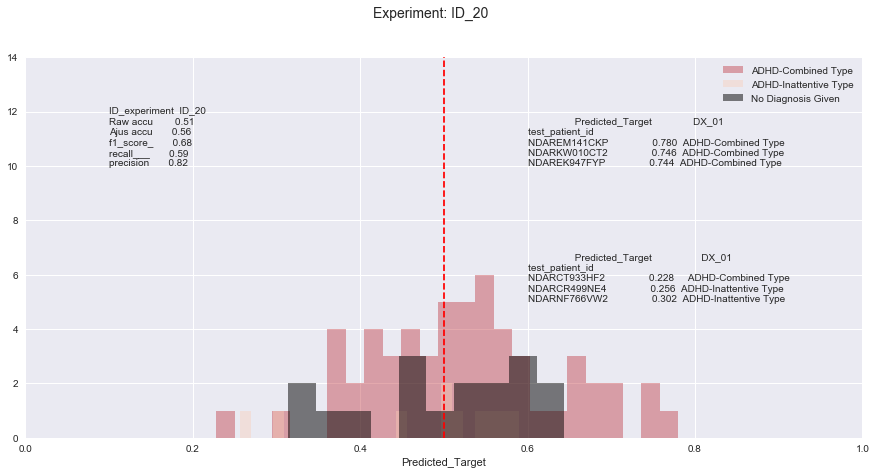

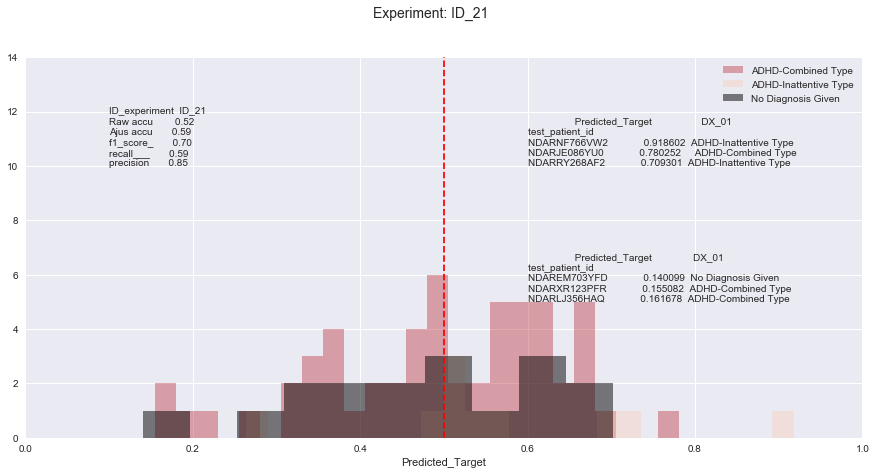

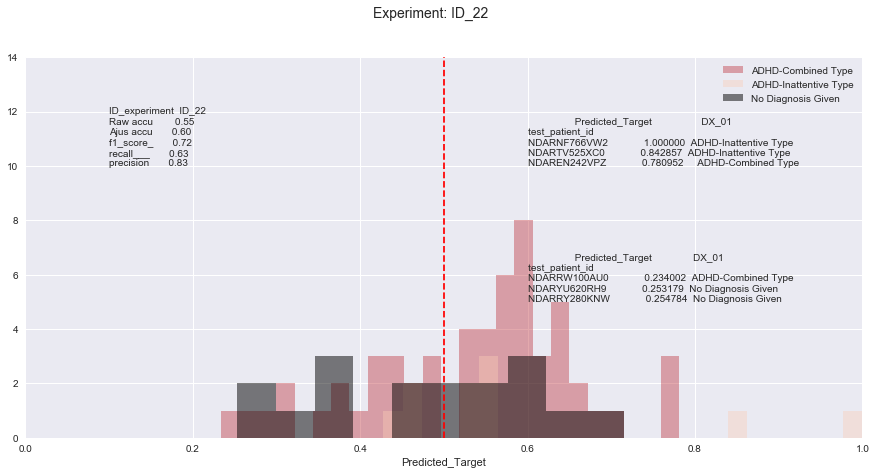

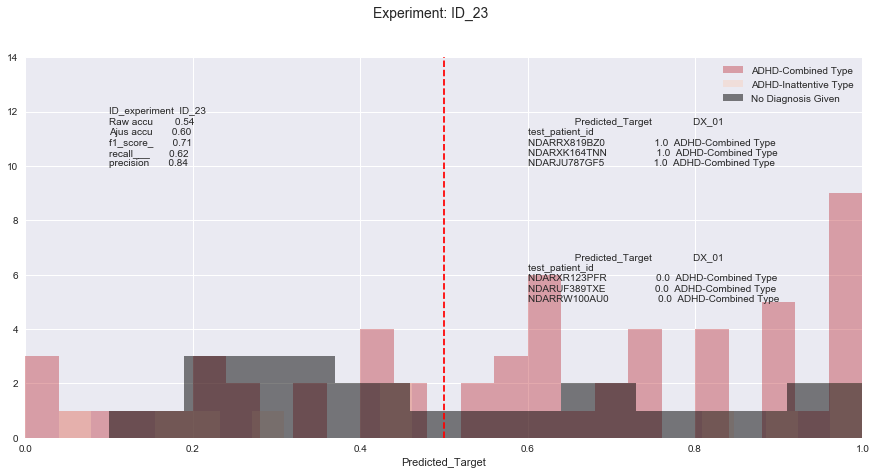

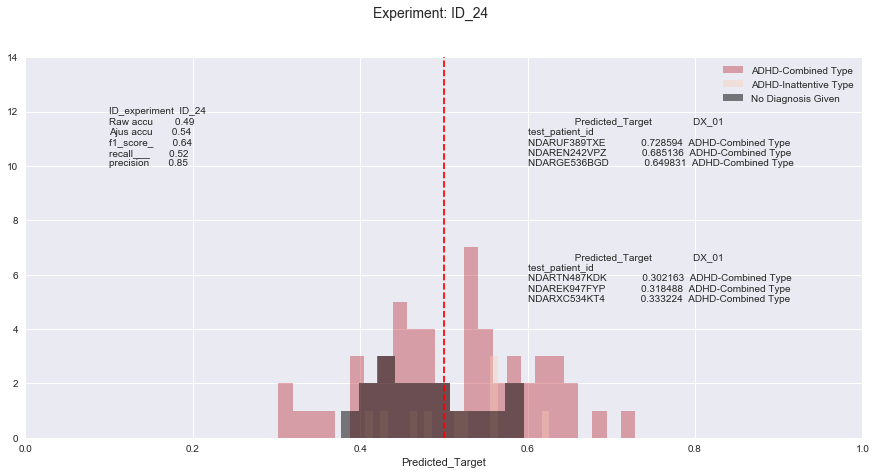

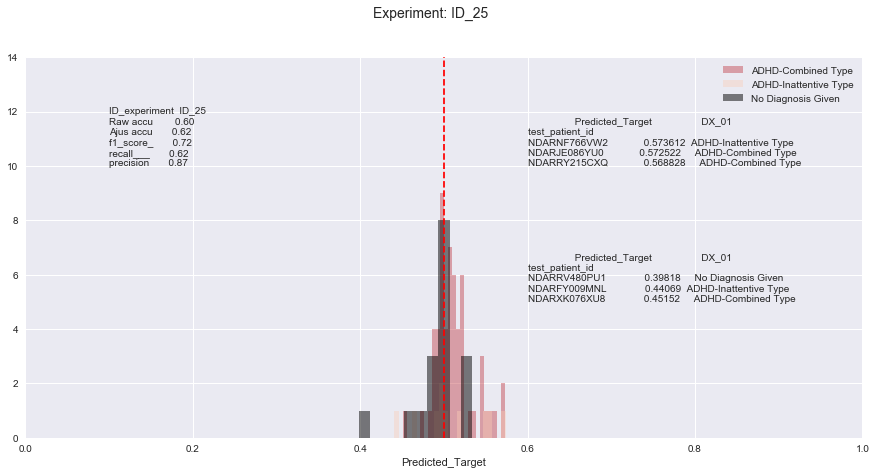

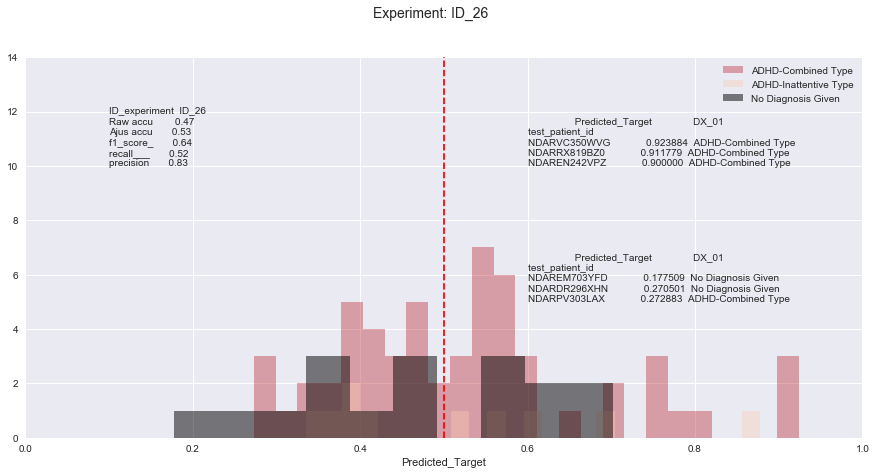

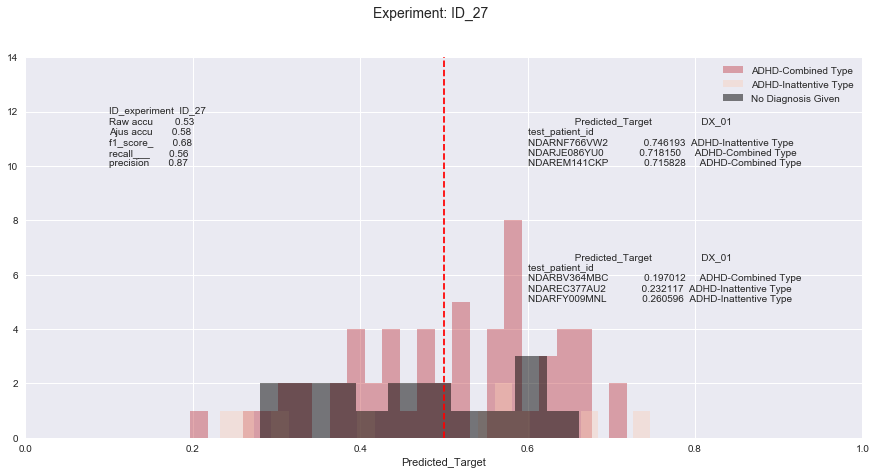

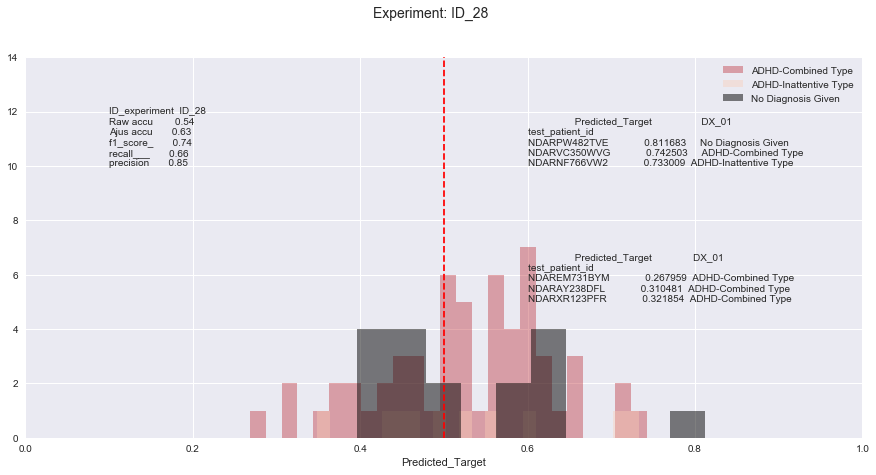

In [5]:
#each_pre_processing='clustering K=20'
#filter_ids=experiments_summary[experiments_summary["pre_processing"]==each_pre_processing]
#indexes=filter_ids.index


#for each_index in ["ID_3","ID_10","ID_12","ID_28","ID_24","ID_10_28"]:
for each_index in ["ID_20",
"ID_21",
"ID_22",
"ID_23",
"ID_24",
"ID_25",
"ID_26",
"ID_27",
"ID_28"]:
    df_metrics=experiments_summary.loc[[each_index]]
    df_metric=df_metrics[['Raw accu',
            'Ajus accu',
            'f1_score_', 
            'recall___',
            'precision']]
    predictions,hightest,lowest=get_predictions_exp(each_index)
    generate_plots_algo(df_metrics=df_metric,
                        df=predictions,
                        title="Experiment: " +each_index,
                        by_c="DX_01",
                        by_2c="Predicted_Target",
                        size=(15,7),
                       hightest=hightest,
                       lowest=lowest)

# Select for 'clustering K=11'

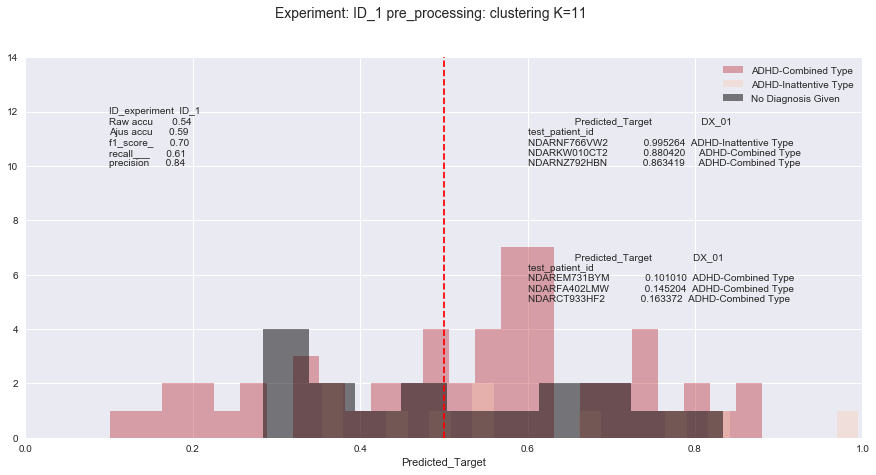

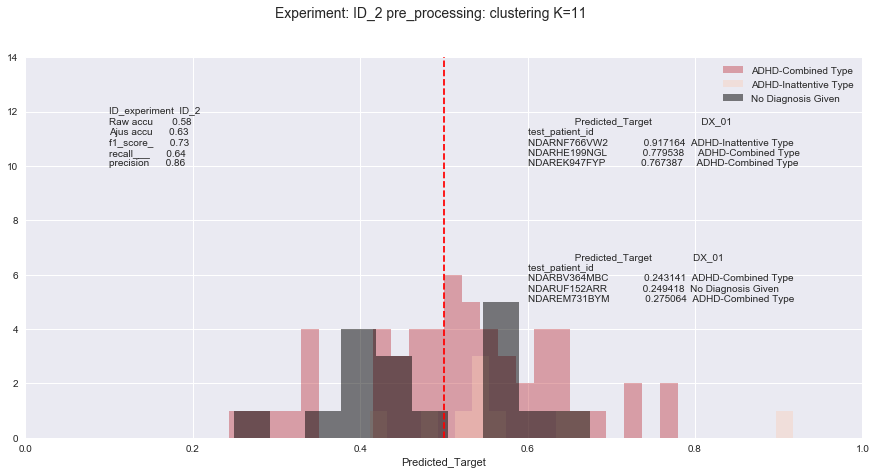

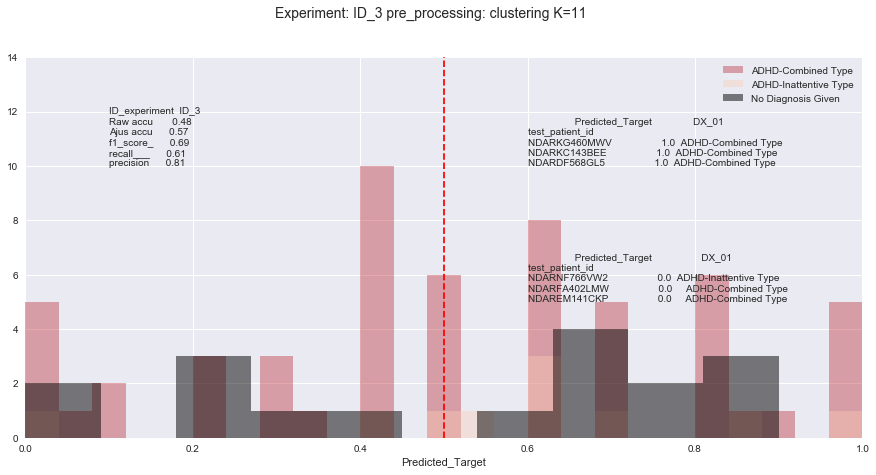

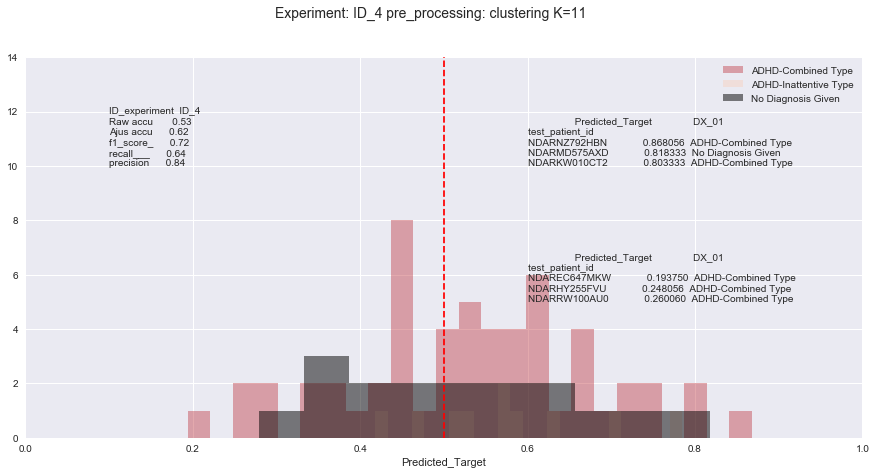

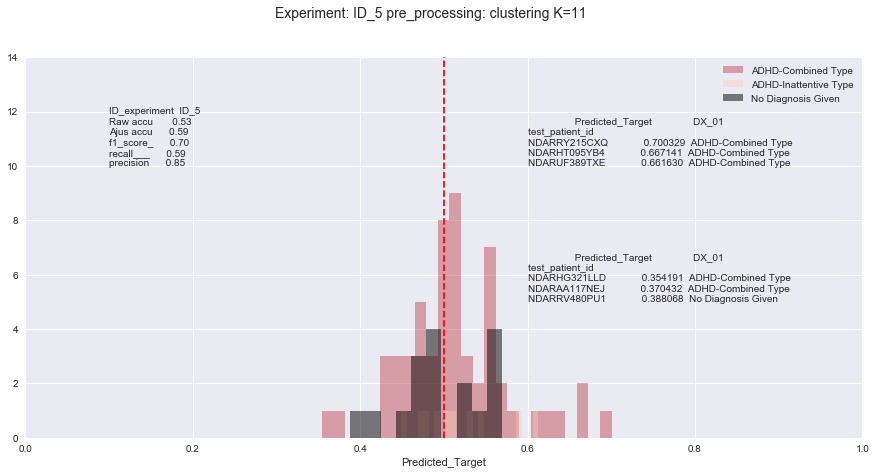

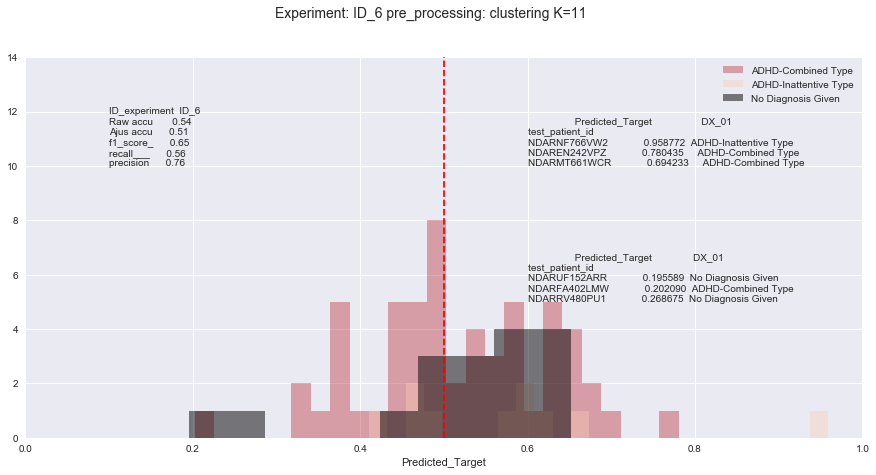

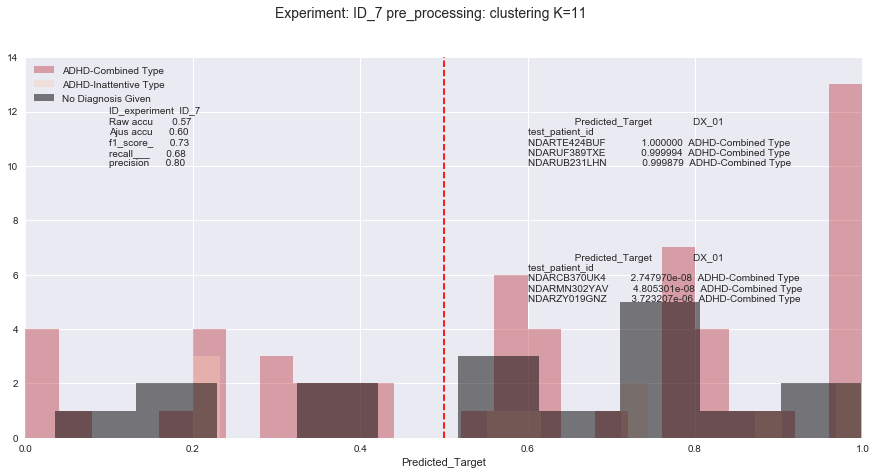

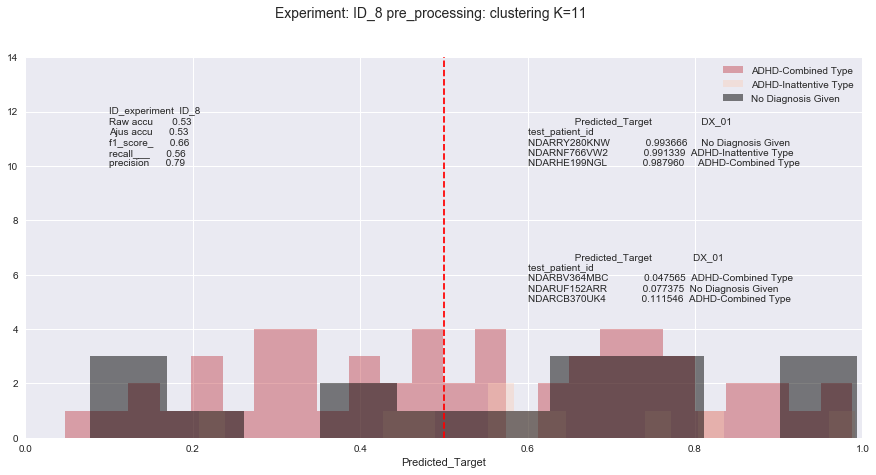

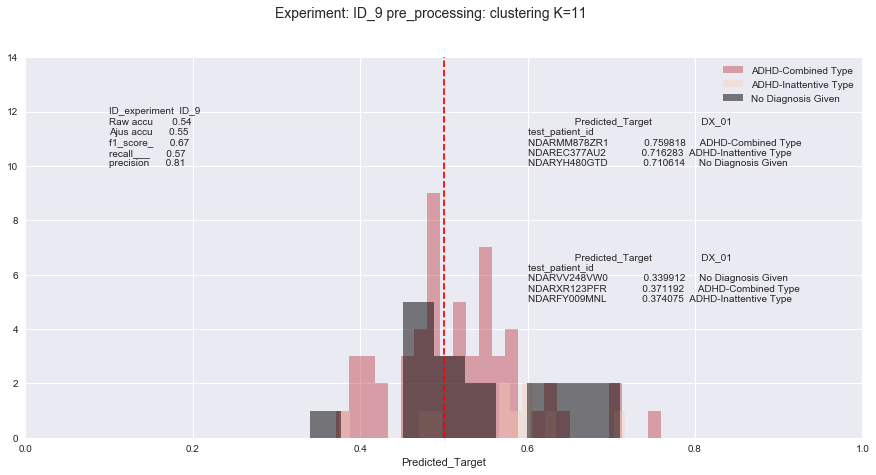

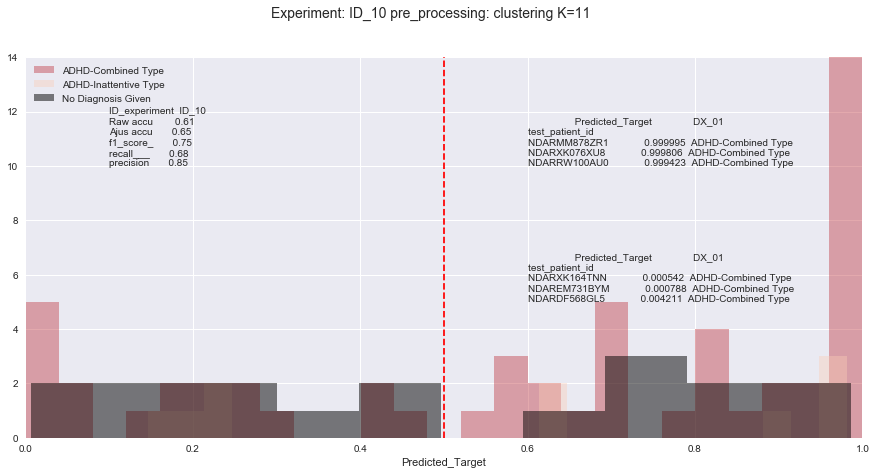

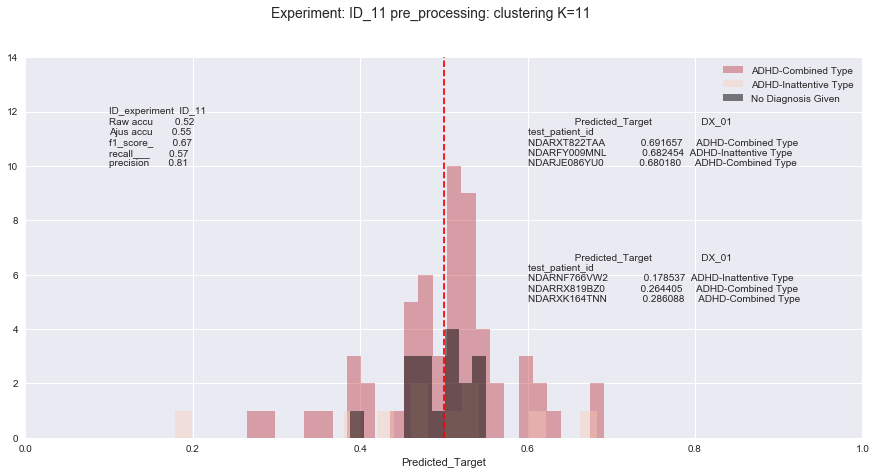

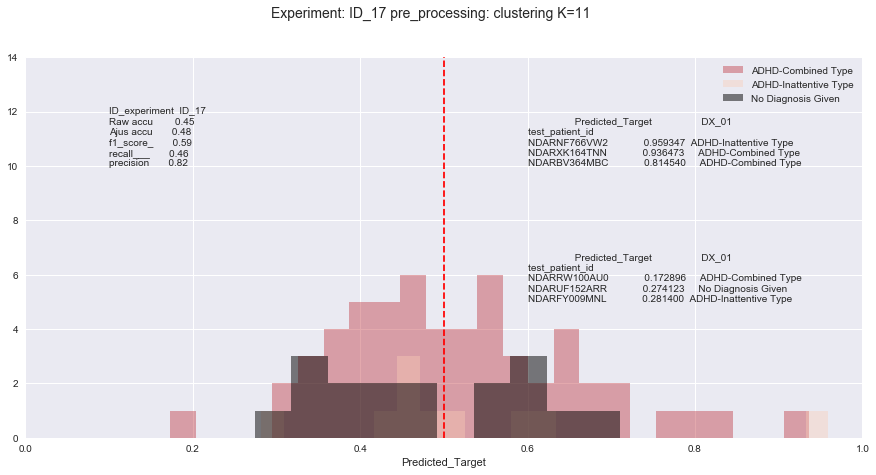

In [33]:
each_pre_processing='clustering K=11'
filter_ids=experiments_summary[experiments_summary["pre_processing"]==each_pre_processing]
indexes=filter_ids.index
for each_index in indexes:
    df_metrics=experiments_summary.loc[[each_index]]
    df_metric=df_metrics[['Raw accu',
            'Ajus accu',
            'f1_score_', 
            'recall___',
            'precision']]
    predictions,hightest,lowest=get_predictions_exp(each_index)
    generate_plots_algo(df_metrics=df_metric,
                        df=predictions,
                        title="Experiment: " +each_index+ " pre_processing: "+ each_pre_processing,
                        by_c="DX_01",
                        by_2c="Predicted_Target",
                        size=(15,7),
                       hightest=hightest,
                       lowest=lowest)
        
        
        
    
    

In [98]:
experiments_summary.index

Index(['ID_19', 'ID_10', 'ID_12', 'ID_28', 'ID_7', 'ID_2', 'ID_4', 'ID_22',
       'ID_25', 'ID_23', 'ID_1', 'ID_5', 'ID_21', 'ID_3', 'ID_15', 'ID_20',
       'ID_27', 'ID_9', 'ID_11', 'ID_16', 'ID_8', 'ID_13', 'ID_14', 'ID_6',
       'ID_24', 'ID_26', 'ID_17', 'ID_18', 'ID_29', 'ID_30', 'ID_10_28'],
      dtype='object', name='ID_experiment')

In [116]:

for each_index in ["ID_10","ID_2"]:
#for each_index in experiments_summary.index:
    df_metrics=experiments_summary.loc[[each_index]]
    df_metric=df_metrics[['Raw accu',
            'Ajus accu',
            'f1_score_', 
            'recall___',
            'precision']]
    predictions,hightest,lowest=get_predictions_exp(each_index)
    predictions_target=predictions[['Predicted_Target']]
    if each_index=="ID_10":
        predictions_target=predictions[['Predicted_Target','DX_01','DX_02']]
        all_predictions=predictions_target
    else:
        all_predictions=all_predictions.join(predictions_target,rsuffix="_"+each_index)
        
all_predictions=all_predictions.fillna("No DX_02 Given").rename(columns={"Predicted_Target": "Predicted_Target_ID_10"})  

In [90]:
all_predictions.DX_01.unique()

array(['ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type',
       'ADHD-Inattentive Type', 'No Diagnosis Given'], dtype=object)

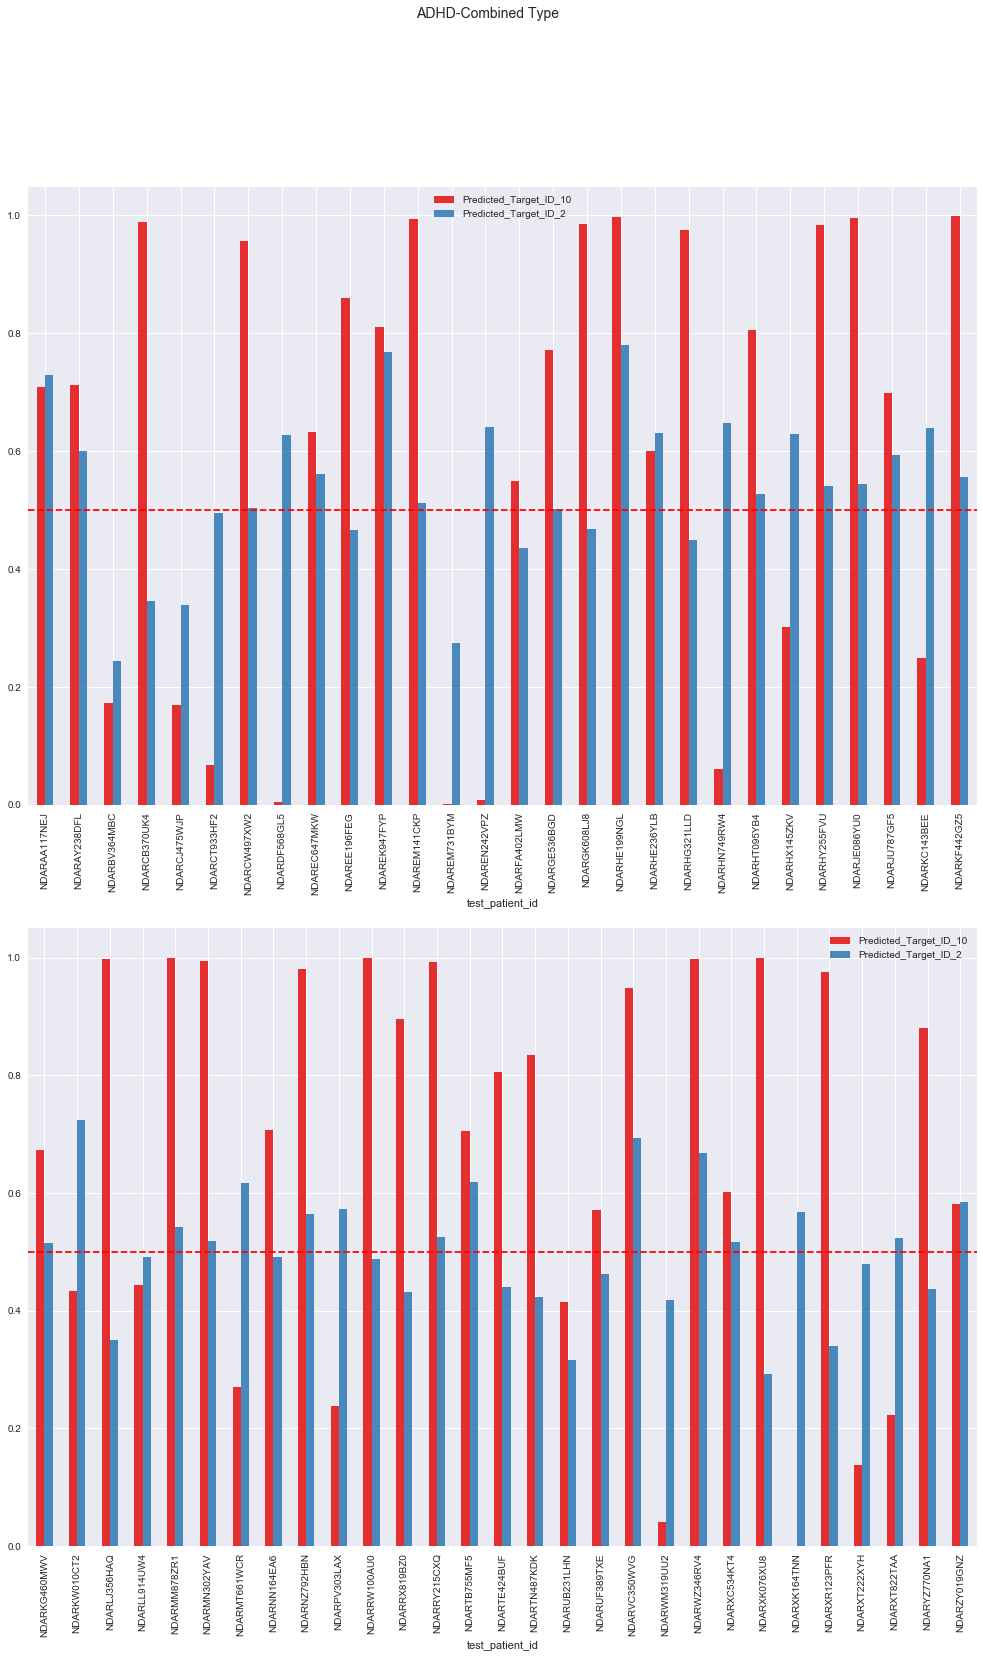

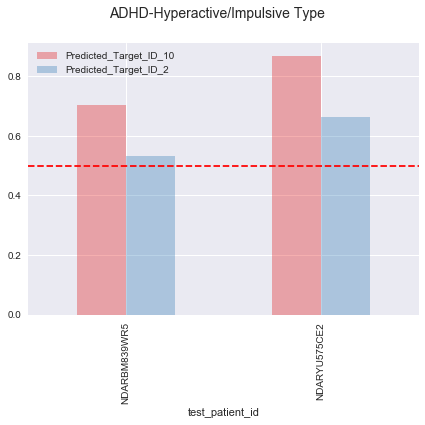

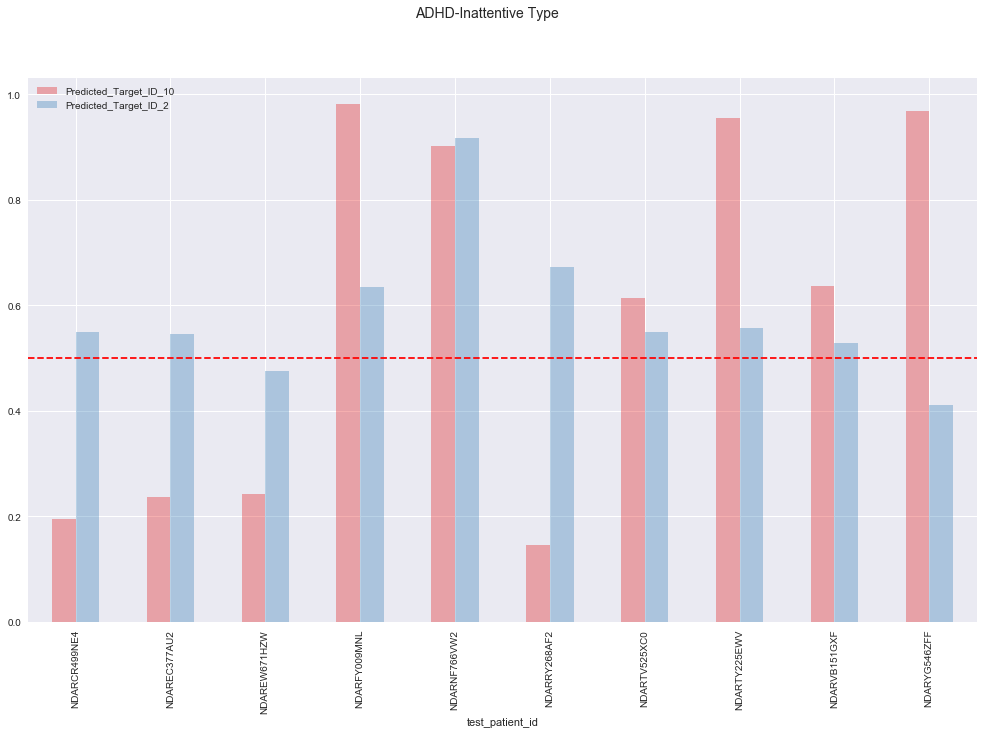

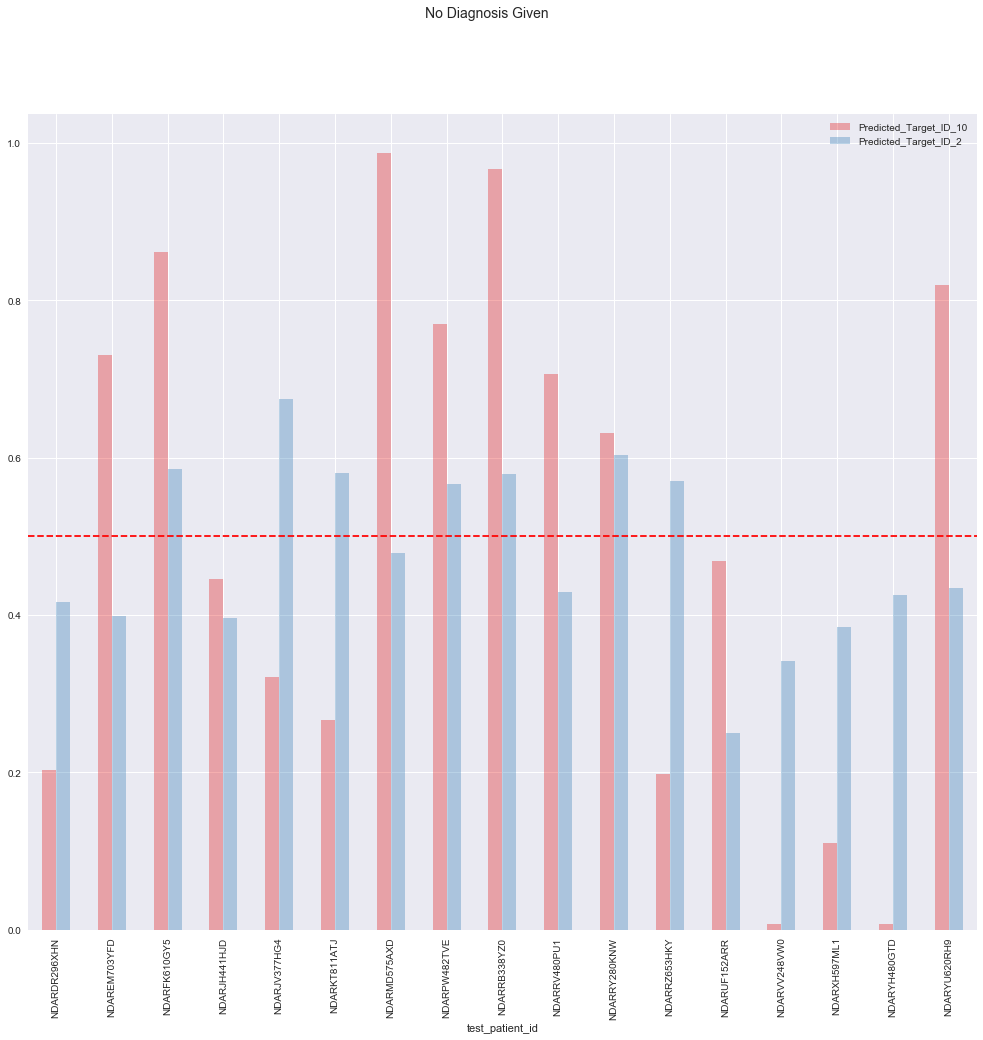

In [117]:
#mpl.style.use(['dark_background'])
for label, df_in in all_predictions.groupby("DX_01"):
    colors_list=sns.color_palette("Set1",4)
    if label=="ADHD-Combined Type":
        #columnas por filas
        fig=plt.figure(figsize=(17,25))
        ax=fig.add_subplot(2,1,1)
        ax1=fig.add_subplot(2,1,2)
        df_in.iloc[0:int(len(df_in)/2)].plot(kind='bar', alpha=0.9,ax=ax,color=colors_list)
        df_in.iloc[int(len(df_in)/2):].plot(kind='bar', alpha=0.9,ax=ax1,color=colors_list)
        ax.axhline(y=0.5, color='r', linestyle='--')
        ax1.axhline(y=0.5, color='r', linestyle='--')
        fig.suptitle(label, fontsize=14)
    if label=="ADHD-Hyperactive/Impulsive Type":
        fig=plt.figure(figsize=(7,5))
        ax=fig.add_subplot(1,1,1)
        df_in.plot(kind='bar', alpha=0.35,ax=ax,color=colors_list)
        ax.axhline(y=0.5, color='r', linestyle='--')
        fig.suptitle(label, fontsize=14)
        
    if label=="ADHD-Inattentive Type":
        fig=plt.figure(figsize=(17,10))
        ax=fig.add_subplot(1,1,1)
        df_in.plot(kind='bar', alpha=0.35,ax=ax,color=colors_list)
        ax.axhline(y=0.5, color='r', linestyle='--')
        fig.suptitle(label, fontsize=14)
        
    if label=="No Diagnosis Given":
        fig=plt.figure(figsize=(17,15))
        ax=fig.add_subplot(1,1,1)
        df_in.plot(kind='bar', alpha=0.35,ax=ax,color=colors_list)
        ax.axhline(y=0.5, color='r', linestyle='--')
        fig.suptitle(label, fontsize=14)
        

   
        
        
        
    



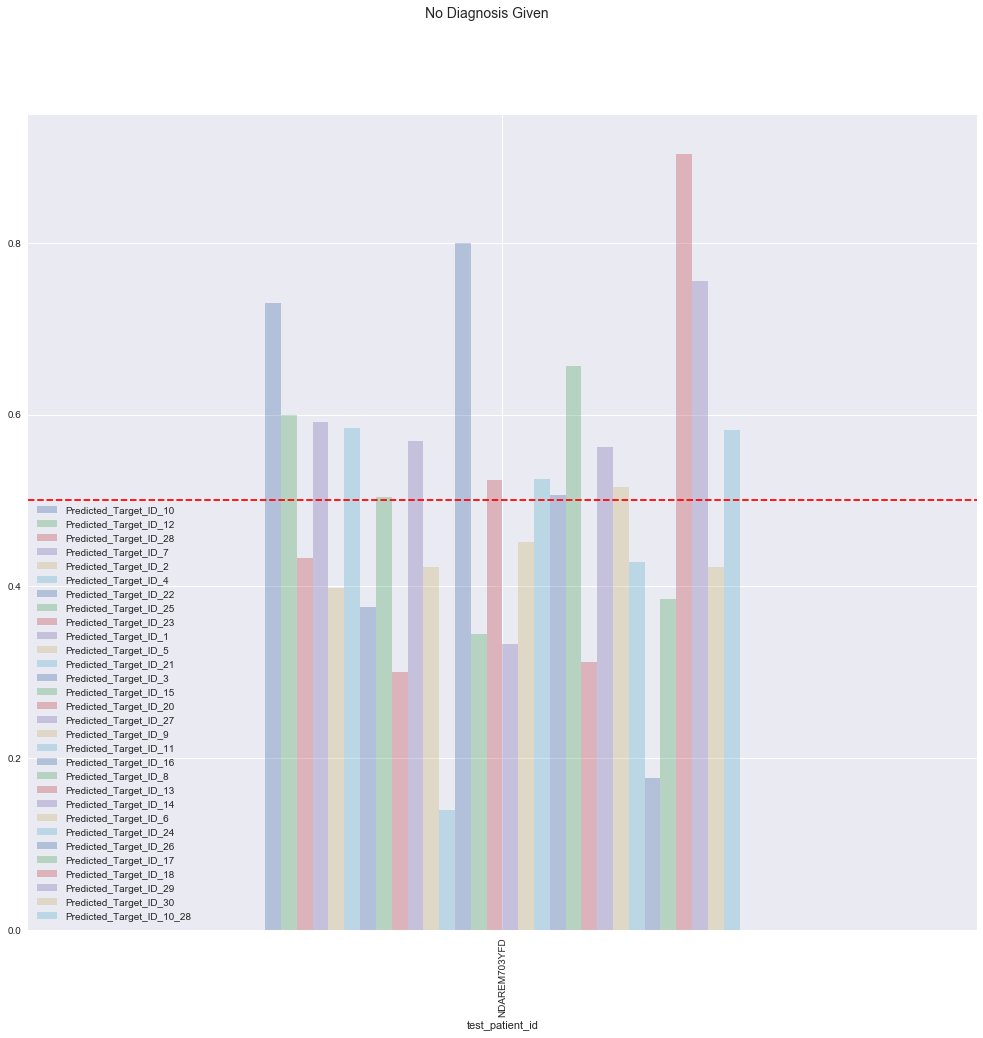

In [110]:
#mpl.style.use(['dark_background'])
for label, df_in in all_predictions.groupby("DX_01"):
    colors_list=sns.color_palette("Set1")
    
    if label=="No Diagnosis Given":
        hold=df_in.copy()
        df_in=hold.iloc[1:2]
        fig=plt.figure(figsize=(17,15))
        ax=fig.add_subplot(1,1,1)
        df_in.plot(kind='bar', alpha=0.35,ax=ax)
        ax.axhline(y=0.5, color='r', linestyle='--')
        fig.suptitle(label, fontsize=14)
        
        
